<a href="https://colab.research.google.com/github/gomlfx/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/My_Prediction_File%2C_Change_Last!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#//////////////////////////////import packages////////////////////////////////

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import tensorflow as tf
import tensorflow.keras.layers as kl
import gym
from stable_baselines.deepq.policies import CnnPolicy
from stable_baselines import DQN
from stable_baselines import PPO2
#python -m ensurepip --default-pip
!pip --version
!pip install keras-rl


from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #best so far
from sklearn.ensemble import RandomForestRegressor #so-called better than DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor #best so far
from sklearn.neural_network import MLPRegressor #best so far
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier #best so far
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.multiclass
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectFromModel


#df = pd.read_csv("https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD1440dOtrain.csv")
#df = pd.read_csv("https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD43200.csv")
df = pd.read_csv("https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD1440dO.csv")

print("This is the shape of the entire file.")
print(df.shape)
#print("")
print(df.tail(1))


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

pip 19.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
This is the shape of the entire file.
(12240, 10)
            day   openDF     high      low  ...  T_close    T_low   T_high  BorS
12239  20191029  1.10983  1.11184  1.10734  ...  1.11497  1.10799  1.11514   NaN

[1 rows x 10 columns]


I can use these styles:
['seaborn-white', 'tableau-colorblind10', 'fivethirtyeight', 'bmh', 'seaborn-colorblind', 'dark_background', 'fast', 'seaborn-dark-palette', 'seaborn-muted', 'seaborn-ticks', 'seaborn-bright', 'seaborn-whitegrid', 'seaborn-darkgrid', 'seaborn-deep', 'ggplot', 'seaborn-notebook', 'grayscale', 'seaborn-pastel', 'seaborn-talk', 'seaborn-poster', 'Solarize_Light2', 'seaborn', 'seaborn-dark', 'seaborn-paper', 'classic', '_classic_test']


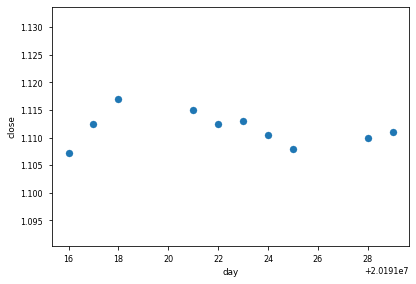

In [2]:
#////////////////////////////////plot the input data/////////////////////////////////////////////

train = pd.DataFrame(data=df)

print("I can use these styles:")
print(plt.style.available)
plt.style.use('seaborn-paper')
train.tail(10).plot.scatter(x='day', y='close', s=50);


In [3]:
print(train.head(2))
print(train.tail(2))

        day  openDF    high     low  ...  T_close   T_low  T_high  BorS
0  19710104  0.5369  0.5369  0.5369  ...   0.5366  0.5366  0.5366   0.0
1  19710105  0.5366  0.5366  0.5366  ...   0.5365  0.5365  0.5365   0.0

[2 rows x 10 columns]
            day   openDF     high      low  ...  T_close    T_low   T_high  BorS
12238  20191028  1.10780  1.11064  1.10760  ...  1.11106  1.10734  1.11184   NaN
12239  20191029  1.10983  1.11184  1.10734  ...  1.11497  1.10799  1.11514   NaN

[2 rows x 10 columns]


In [7]:

#///////////////////////////////core regression parts///////////////////////////////////////

#d = "https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD1440.csv"
#df = pd.DataFrame(data=d)
#df


#model = LinearRegression()
#model = KNeighborsRegressor(n_neighbors=2)
#model = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=2, min_samples_leaf=2)
#model = AdaBoostRegressor(DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=2, min_samples_leaf=2), n_estimators=200)
#model = AdaBoostRegressor(RandomForestRegressor(max_depth=6, min_samples_split=7, min_samples_leaf=4), n_estimators=200)
#model = RandomForestRegressor(n_estimators=100, verbose=2)
#model = GradientBoostingRegressor()
model = LGBMRegressor()
#model = DQN()
#model = PPO2()
#model = XGBRegressor()
#model = xgb.XGBRegressor()
#model = RandomForestClassifier(max_depth=6, min_samples_split=7, min_samples_leaf=4)
#model = LogisticRegression()
#model = MLPRegressor(hidden_layer_sizes=4, max_iter=4000)


#features = ['open']
features = ['day', 'openDF', 'high', 'low', 'close','volume']
#target = 'close'
#target = ['T_high','T_low','T_close','BorS']
target = 'T_high'

model.fit(train[features], train[target])
#error()
#model.predict([[20191004, 1.09809]])
print("")
print('This is a Regression prediction')
print(model.predict([[20191030,1.11134,1.11514,1.10799,1.11497,64677]]))
#print(model.predict([[1.08878]]))


This is a Regression prediction
[1.11786879]


In [5]:
day = [[c/1] for c in range(1)]
predictions = model.predict(day)

ValueError: ignored

In [0]:
train.tail(10).plot.scatter(x='day', y='close', s=50)
plt.plot(day, predictions)
plt.title('GradientBoostingRegressor');

In [0]:
data_te = pd.read_csv("https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD1440dOtest.csv")

test = pd.DataFrame(data=data_te)

ax = train.tail(10).plot.scatter(x='day', y='close', s=50)
test.tail(10).plot.scatter(x='day', y='close', s=50, color='orange', ax=ax)
plt.legend(['Train data', 'Test data']);


In [0]:

#//////////////////////////////core classification parts////////////////////////////////

print("")
train, test = train_test_split(df, random_state=0)
print("This is the classification train, test shape.")
print(train.shape), print(test.shape)
print(df.head(1))
print("")

print(train.BorS.value_counts(normalize=True))
print("")

predictions = [0] * len(train)
print(predictions)
print("")

from sklearn.metrics import accuracy_score
print(accuracy_score(train.BorS, predictions))
print("")

from sklearn.metrics import confusion_matrix
def matrix(y_true, y_pred):
  data = confusion_matrix(y_true, y_pred)
  index = ['Actual 0', 'Actual 1']
  columns = ['Predicted 0', 'predicted 1']
  return pd.DataFrame(data,index,columns)
matrix(train.BorS, predictions)

print(train[['day','open','high','low','close','volume']].info())
print("")
print("Show how many elements are missing from each feature.")
print(train.day.isnull().sum())
print(train.open.isnull().sum())
print(train.high.isnull().sum())
print(train.low.isnull().sum())
print(train.close.isnull().sum())
print("")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#features = ['day', 'open']
features = ['day', 'open', 'high', 'low', 'close', 'volume']
#target = ['close']
target = ['BorS']

model = DecisionTreeClassifier(max_depth=2)
model.fit(train[features], train[target])

from sklearn.ensemble import RandomForestClassifier
model = AdaBoostClassifier(RandomForestClassifier(max_depth=6, min_samples_split=7, min_samples_leaf=4), n_estimators=20)
model.fit(train[features], train[target])

#train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))
#test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

#/////////////////////////////////////check model for train error ratio/////////////////////////////////
 
def error():
  #calculate mean absolute error on the training data
  y_true = train[target]
  y_pred = model.predict(train[features])
  train_error = mean_absolute_error(y_true, y_pred)

  #calculate mean absolute error on the test data
  y_true = test[target]
  y_pred = model.predict(test[features])
  test_error = mean_absolute_error(y_true, y_pred)

  #display the errors
  print("")
  print("This is Classification module error.")
  print('Train Error: $', round(train_error))
  print('Test Error: $', round(test_error))

error()
#/////////////////////////////////plot the train error, regular graph, and predicted/////////////////////

#//////////////////////////////classification module////////////////////////////////////////////////////
